In [1]:
import pandas as pd
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import plotly.express as px


In [54]:
centers=pd.read_csv('DATA/fulfilment_center_info.csv')
meals=pd.read_csv('DATA/meal_info.csv')
df=pd.read_csv('DATA/train.csv')

#### Understand the dataset

In [55]:
centers.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [56]:
meals.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [57]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [58]:
centers['center_type'].unique()

array(['TYPE_A', 'TYPE_B', 'TYPE_C'], dtype=object)

In [59]:
meals.category.unique()

array(['Beverages', 'Extras', 'Soup', 'Other Snacks', 'Salad',
       'Rice Bowl', 'Starters', 'Sandwich', 'Pasta', 'Desert', 'Biryani',
       'Pizza', 'Fish', 'Seafood'], dtype=object)

In [60]:
meals.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [61]:
len(df['week'].unique())
# in this data set ,there are 145 unique weeks

145

### merge the data set

In [62]:
df=df.merge(centers,on='center_id', sort=False)
df=df.merge(meals,on='meal_id', sort=False)
df = df.sort_values(by=['week'])

In [8]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,difference
213354,1129793,1,93,1971,261.96,289.06,1,0,528,461,34,TYPE_A,3.9,Sandwich,Italian,27.10
52285,1160002,1,83,1248,152.29,240.62,0,0,107,659,77,TYPE_A,5.3,Beverages,Indian,88.33
58666,1132348,1,67,1248,251.23,253.23,0,0,26,638,56,TYPE_B,7.0,Beverages,Indian,2.00
226680,1420300,1,17,1902,387.03,446.23,0,0,55,517,56,TYPE_A,3.2,Biryani,Indian,59.20
256134,1347563,1,139,2581,584.91,613.07,1,1,149,693,34,TYPE_C,2.8,Pizza,Continental,28.16


In [63]:
len(df['center_id'].unique())

77

In [64]:
df.shape

(456548, 15)

In [65]:
df.groupby(['cuisine', 'category']).size().reset_index(name='count').sort_values(by=['cuisine', 'count'], ascending=[True, False])

,cuisine,category,count
2,Continental,Pizza,33138
0,Continental,Beverages,32554
3,Continental,Seafood,26916
1,Continental,Fish,10187
7,Indian,Rice Bowl,33408
4,Indian,Beverages,29296
6,Indian,Desert,29294
5,Indian,Biryani,20614
8,Italian,Beverages,33381
11,Italian,Sandwich,33291


#### we can understand which is more popular male in each cuisin ex(in india Rice Bowl is more popular)

In [66]:
df.groupby(['cuisine', 'category'])['meal_id'].nunique().reset_index(name='unique_meal_count')


,cuisine,category,unique_meal_count
0,Continental,Beverages,3
1,Continental,Fish,3
2,Continental,Pizza,3
3,Continental,Seafood,3
4,Indian,Beverages,3
5,Indian,Biryani,3
6,Indian,Desert,3
7,Indian,Rice Bowl,3
8,Italian,Beverages,3
9,Italian,Pasta,3


##### Here we can see that all catogory have 3 meal types

### DATA PREPROCESSING

In [67]:


df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [68]:
df.dropna(axis=0,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456548 entries, 213354 to 247830
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [70]:
df[df.duplicated()]
# No duplicate value

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine


### Handling Outliers

1. ##### we know that checkout price will not be less than 10 in restarant food price and we want to check why this meal have this value

In [71]:
df[df['checkout_price']<=10]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
112240,1300283,38,73,1230,2.97,316.25,0,0,14,576,34,TYPE_A,4.0,Beverages,Continental


In [72]:
df['difference']=abs(df['checkout_price']-df['base_price'])

In [73]:
len(df[df['meal_id']==1230])

10746

In [74]:
df[df['meal_id']==1230].describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,difference
count,1.074600e+04,10746.000000,10746.000000,10746.0,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000,10746.000000
mean,1.250705e+06,73.254979,83.367579,1230.0,348.084174,368.473102,0.076307,0.105807,171.595850,600.902289,56.459985,4.023627,21.908077
std,1.439893e+05,41.848653,46.060823,0.0,52.507440,63.876880,0.265502,0.307605,148.641426,66.859454,18.124011,1.051106,45.291067
min,1.000227e+06,1.000000,10.000000,1230.0,2.970000,266.810000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000,0.000000
25%,1.126817e+06,37.000000,50.000000,1230.0,316.280000,319.130000,0.000000,0.000000,69.000000,553.000000,34.000000,3.500000,1.000000
50%,1.249803e+06,74.000000,77.000000,1230.0,323.980000,336.635000,0.000000,0.000000,135.000000,596.000000,56.000000,3.900000,1.000000
75%,1.375608e+06,110.000000,113.000000,1230.0,380.240000,390.000000,0.000000,0.000000,216.000000,654.000000,77.000000,4.500000,4.790000
max,1.499999e+06,145.000000,186.000000,1230.0,532.530000,533.530000,1.000000,1.000000,1905.000000,713.000000,93.000000,7.000000,313.280000


##### from above info we can understand 25 percentil is 1 and 75 percentile is 4.79 ,we can also see the max value is 313 which is very high , we can assume that there are a lot outliers in this , so we will remove the row which have greater than 158 ( mean+std*3 )

In [75]:
21.9+45.29*3

157.77

In [76]:
df[(df['meal_id'] == 1230) & (df['difference'] > 157)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,difference
113072,1485425,9,53,1230,175.60,351.20,0,0,26,590,56,TYPE_A,3.8,Beverages,Continental,175.60
112240,1300283,38,73,1230,2.97,316.25,0,0,14,576,34,TYPE_A,4.0,Beverages,Continental,313.28
114920,1419560,38,10,1230,183.33,453.99,0,0,15,590,56,TYPE_B,6.3,Beverages,Continental,270.66
111265,1077636,38,14,1230,184.33,475.33,0,0,26,654,56,TYPE_C,2.7,Beverages,Continental,291.00
116073,1463779,39,132,1230,306.55,476.33,0,0,14,522,56,TYPE_A,3.9,Beverages,Continental,169.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114168,1498860,132,30,1230,336.59,515.13,0,1,283,604,56,TYPE_A,3.5,Beverages,Continental,178.54
106268,1354687,132,55,1230,332.74,515.13,0,1,202,647,56,TYPE_C,2.0,Beverages,Continental,182.39
106383,1325861,132,24,1230,338.53,514.13,0,1,188,614,85,TYPE_B,3.6,Beverages,Continental,175.60
111356,1401315,132,14,1230,337.62,498.58,0,0,285,654,56,TYPE_C,2.7,Beverages,Continental,160.96


In [77]:
df_cleaned = df.drop(df[(df['meal_id'] == 1230) & (df['difference'] > 157)].index)


2. #### we want to check which food have high diff between checkout price and base price which are outliers 

In [78]:
def find_max_difference_row(dataframe, col1, col2):
    # Calculate the absolute difference between the two columns
    dataframe['difference'] = abs(dataframe[col1] - dataframe[col2])
    
    # Find the row with the maximum difference
    max_difference_row = dataframe.loc[dataframe['difference']>100]
    
    return max_difference_row

In [79]:
max_diff=find_max_difference_row(df_cleaned,'checkout_price','base_price')
max_diff

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,difference
56136,1027528,1,157,1248,144.59,251.23,0,0,175,609,93,TYPE_A,4.1,Beverages,Indian,106.64
369604,1196787,1,109,1770,338.53,485.03,0,0,69,599,56,TYPE_A,3.6,Biryani,Indian,146.50
374549,1205449,1,101,1770,338.53,485.03,0,0,14,699,85,TYPE_C,2.8,Biryani,Indian,146.50
374405,1239653,1,10,1770,340.53,484.03,0,0,242,590,56,TYPE_B,6.3,Biryani,Indian,143.50
369176,1264861,1,11,1770,338.53,484.03,0,0,41,679,56,TYPE_A,3.7,Biryani,Indian,145.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277805,1166440,145,139,1445,581.03,727.53,0,0,15,693,34,TYPE_C,2.8,Seafood,Continental,146.50
147119,1268389,145,77,1727,268.75,423.95,0,1,203,676,34,TYPE_A,3.8,Rice Bowl,Indian,155.20
292027,1467603,145,32,2867,581.03,727.53,0,0,15,526,34,TYPE_A,3.8,Seafood,Continental,146.50
284519,1169714,145,74,2444,581.03,726.53,0,0,13,702,35,TYPE_A,2.8,Seafood,Continental,145.50


In [80]:
### some food food high diff like beverage because it will have high tax or discount , we will consider all things 

In [81]:
max_diff.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,difference
count,3.402800e+04,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000,34028.000000
mean,1.250695e+06,76.669067,83.219731,2008.492359,371.600266,535.449388,0.513460,0.420918,433.630481,602.068267,56.920977,4.031024,164.088854
std,1.441239e+05,41.886051,45.606872,532.231716,131.843752,151.680251,0.499826,0.493714,786.400464,66.438041,17.975659,1.077187,46.245466
min,1.000008e+06,1.000000,10.000000,1109.000000,45.620000,182.360000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000,100.820000
25%,1.125854e+06,39.000000,50.000000,1558.000000,273.540000,427.830000,0.000000,0.000000,94.000000,553.000000,34.000000,3.600000,126.100000
50%,1.250998e+06,80.000000,77.000000,1962.000000,434.590000,619.860000,1.000000,0.000000,203.000000,599.000000,56.000000,4.000000,154.200000
75%,1.375474e+06,114.000000,110.000000,2490.000000,484.030000,659.630000,1.000000,1.000000,446.000000,654.000000,77.000000,4.500000,194.000000
max,1.499973e+06,145.000000,186.000000,2956.000000,728.530000,866.270000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000,561.600000


##### from above we can understand 25 percentile minimum value from both checkout price and base price is 273 , max value of 75 percentile from both checout_price and base price is 866.27 so , we will remove the rows which have less than 273  checkout price and geater than 659.63 base price.

In [82]:
max_diff[(max_diff['checkout_price']<=280) & (max_diff['base_price']>=659)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,difference
290465,1419554,37,102,2444,145.53,707.13,0,0,54,593,77,TYPE_A,2.8,Seafood,Continental,561.60
290466,1192242,38,102,2444,243.50,708.13,0,0,15,593,77,TYPE_A,2.8,Seafood,Continental,464.63
323910,1000988,85,161,2304,226.04,736.23,0,0,69,658,34,TYPE_B,3.9,Desert,Indian,510.19
285474,1176573,94,92,2444,163.93,708.13,1,0,15,526,34,TYPE_C,2.9,Seafood,Continental,544.20


In [83]:
max_diff_cleaned = df.drop(max_diff[(max_diff['checkout_price']<=280) & (max_diff['base_price']>=659)].index)

In [84]:
df1= max_diff_cleaned.copy()
df5=max_diff_cleaned.copy()

##### method 1

In [85]:

def outlier_threshold(df,column,q1=0.25,q3=0.75):
    quantile1=df[column].quantile(q1)
    quantile3=df[column].quantile(q3)
    iqr=quantile3-quantile1
    low_limit=quantile1-1.5*iqr
    up_limit=quantile3+1.5*iqr

    return low_limit,up_limit


def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
      return True
  else:
      return False

def replace_with_threshold(df,column):
    low,upper=outlier_threshold(df,column)
    df.loc[(df[column]<low),column]=low
    df.loc[(df[column]>upper),column]=upper
    

In [86]:
columns=['checkout_price','base_price','num_orders','op_area']
for col_name in columns:
    replace_with_threshold(df1,col_name)

for col_name in columns:
    print(col_name+' :',check_outlier(df1,col_name))

checkout_price : False
base_price : False
num_orders : False
op_area : False


##### method 2

In [87]:
def handling_outlier(df5, column):
    categories = df5['category'].unique()
    
    for category in categories:
        
        new = df5[df5['category'] == category].copy()

        print('Category:', category)
        
       
        q1 = new[column].quantile(0.25)
        q3 = new[column].quantile(0.75)
        Iqr = q3 - q1
        lower = q1 - 1.5 * Iqr
        upper = q3 + 1.5 * Iqr
        
        
        outliers = new[(new[column] > upper) | (new[column] < lower)]

        
        new.loc[new[column] > upper, column] = upper
        new.loc[new[column] < lower, column] = lower
        
        df5.loc[df5['category'] == category, column] = new[column]
        print('Number of outliers:', len(outliers))
    
    return df5



In [88]:
df5=handling_outlier(df5,'checkout_price')

Category: Sandwich
Number of outliers: 1911
Category: Beverages
Number of outliers: 0
Category: Biryani
Number of outliers: 1043
Category: Pizza
Number of outliers: 0
Category: Pasta
Number of outliers: 85
Category: Desert
Number of outliers: 33
Category: Seafood
Number of outliers: 1
Category: Starters
Number of outliers: 7972
Category: Rice Bowl
Number of outliers: 0
Category: Other Snacks
Number of outliers: 111
Category: Soup
Number of outliers: 0
Category: Extras
Number of outliers: 868
Category: Salad
Number of outliers: 24
Category: Fish
Number of outliers: 3295


### Feature Engineering

In [89]:
df2=df1.copy()
df6=df5.copy()

In [90]:
df2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,difference
213354,1129793,1,93,1971,261.96,289.06,1,0,528,461,34,TYPE_A,3.90,Sandwich,Italian,27.10
52285,1160002,1,83,1248,152.29,240.62,0,0,107,659,77,TYPE_A,5.30,Beverages,Indian,88.33
58666,1132348,1,67,1248,251.23,253.23,0,0,26,638,56,TYPE_B,5.85,Beverages,Indian,2.00
226680,1420300,1,17,1902,387.03,446.23,0,0,55,517,56,TYPE_A,3.20,Biryani,Indian,59.20
256134,1347563,1,139,2581,584.91,613.07,1,1,149,693,34,TYPE_C,2.80,Pizza,Continental,28.16


In [91]:
df2['discount_perc']=(df2['base_price']-df2['checkout_price']/df2['base_price']).round(2)
df2['discount y/n']=[1 if x>=0 else 0 for x in df2['discount_perc']]
df2['new_homepage_featured'] = df2['homepage_featured'].map({0: 'No', 1: 'Yes'})
df2['new_emailer_for_promotion']=df2['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
df2['featured_promotion']=df2['new_homepage_featured']+'-'+df2['new_emailer_for_promotion']
df2['new_category_cuisine'] = df2['category'] + '_' + df2['cuisine']
df2['new_center_type_city_code'] = df2['center_type'] + '_' + df2['city_code'].astype(str)


In [92]:
df['discount_perc'] = (df['base_price'] - df['checkout_price'] / df['base_price']).round(2)
df['discount y/n'] = [1 if x >= 0 else 0 for x in df['discount_perc']]
df['new_homepage_featured'] = df['homepage_featured'].map({0: 'No', 1: 'Yes'})
df['new_emailer_for_promotion'] = df['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
df['featured_promotion'] = df['new_homepage_featured'] + '-' + df['new_emailer_for_promotion']
df['new_category_cuisine'] = df['category'] + '_' + df['cuisine']
df['new_center_type_city_code'] = df['center_type'] + '_' + df['city_code'].astype(str)


In [93]:
df6['discount_perc'] = ((df6['base_price'] - df6['checkout_price']) / df6['base_price']).round(2)
df6['discount y/n'] = [1 if x >= 0 else 0 for x in df6['discount_perc']]
df6['new_homepage_featured'] = df6['homepage_featured'].map({0: 'No', 1: 'Yes'})
df6['new_emailer_for_promotion'] = df6['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
df6['featured_promotion'] = df6['new_homepage_featured'] + '-' + df6['new_emailer_for_promotion']
df6['new_category_cuisine'] = df6['category'] + '_' + df6['cuisine']
df6['new_center_type_city_code'] = df6['center_type'] + '_' + df6['city_code'].astype(str)


### Feature Selection

/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


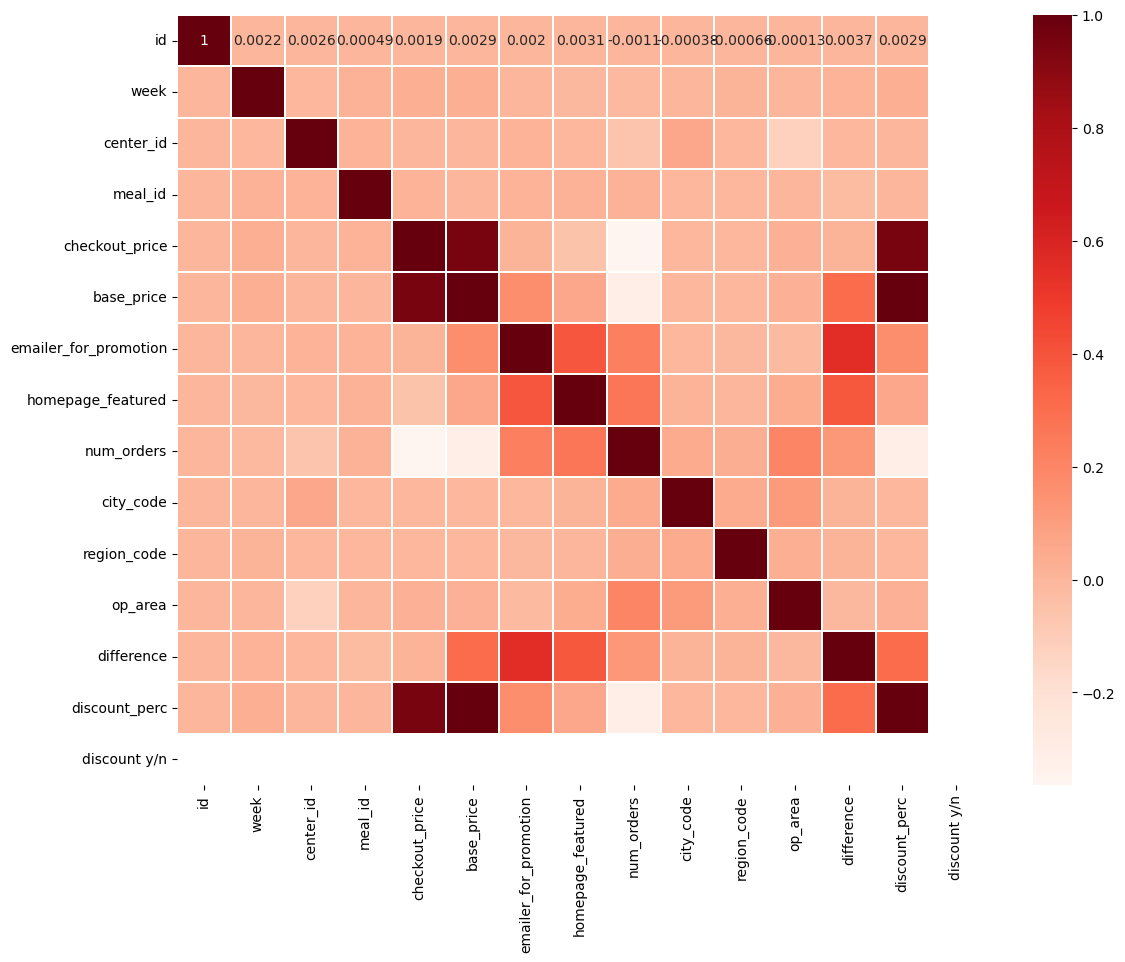

In [94]:
numeric_df2=df2.select_dtypes(['int','float'])
c=numeric_df2.corr()
plt.figure(figsize=(13,10))
sns.heatmap(c,annot=True,linewidths=0.1,cmap='Reds')
plt.show()

In [95]:
df2.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'difference', 'discount_perc', 'discount y/n', 'new_homepage_featured',
       'new_emailer_for_promotion', 'featured_promotion',
       'new_category_cuisine', 'new_center_type_city_code'],
      dtype='object')

In [96]:
df4=df.drop(['id','base_price','emailer_for_promotion','homepage_featured','city_code','center_type','category','cuisine',
          'new_homepage_featured','new_emailer_for_promotion'],axis=1)

In [97]:
df3=df2.drop(['id','base_price','emailer_for_promotion','homepage_featured','city_code','center_type','category','cuisine',
          'new_homepage_featured','new_emailer_for_promotion'],axis=1)

In [98]:
df7=df6.drop(['id','base_price','emailer_for_promotion','homepage_featured','city_code','center_type','category','cuisine',
          'new_homepage_featured','new_emailer_for_promotion'],axis=1)

In [99]:
df3.head()

,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,difference,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
213354,1,93,1971,261.96,528,34,3.90,27.10,288.15,1,No-Yes,Sandwich_Italian,TYPE_A_461
52285,1,83,1248,152.29,107,77,5.30,88.33,239.99,1,No-No,Beverages_Indian,TYPE_A_659
58666,1,67,1248,251.23,26,56,5.85,2.00,252.24,1,No-No,Beverages_Indian,TYPE_B_638
226680,1,17,1902,387.03,55,56,3.20,59.20,445.36,1,No-No,Biryani_Indian,TYPE_A_517
256134,1,139,2581,584.91,149,34,2.80,28.16,612.12,1,Yes-Yes,Pizza_Continental,TYPE_C_693


In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456544 entries, 213354 to 247830
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   week                       456544 non-null  int64  
 1   center_id                  456544 non-null  int64  
 2   meal_id                    456544 non-null  int64  
 3   checkout_price             456544 non-null  float64
 4   num_orders                 456544 non-null  int64  
 5   region_code                456544 non-null  int64  
 6   op_area                    456544 non-null  float64
 7   difference                 456544 non-null  float64
 8   discount_perc              456544 non-null  float64
 9   discount y/n               456544 non-null  int64  
 10  featured_promotion         456544 non-null  object 
 11  new_category_cuisine       456544 non-null  object 
 12  new_center_type_city_code  456544 non-null  object 
dtypes: float64(4), int64(6), obje

### Label Encoding

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()
df3['featured_promotion'] = le.fit_transform(df3['featured_promotion'])
df3['new_category_cuisine'] = le.fit_transform(df3['new_category_cuisine'])
df3['new_center_type_city_code'] = le.fit_transform(df3['new_center_type_city_code'])


In [103]:
df4['featured_promotion'] = le.fit_transform(df4['featured_promotion'])
df4['new_category_cuisine'] = le.fit_transform(df4['new_category_cuisine'])
df4['new_center_type_city_code'] = le.fit_transform(df4['new_center_type_city_code'])


In [104]:
df7['featured_promotion'] = le.fit_transform(df7['featured_promotion'])
df7['new_category_cuisine'] = le.fit_transform(df7['new_category_cuisine'])
df7['new_center_type_city_code'] = le.fit_transform(df7['new_center_type_city_code'])


In [105]:
df3.head()

,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,difference,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
213354,1,93,1971,261.96,528,34,3.90,27.10,288.15,1,1,13,1
52285,1,83,1248,152.29,107,77,5.30,88.33,239.99,1,0,1,26
58666,1,67,1248,251.23,26,56,5.85,2.00,252.24,1,0,1,45
226680,1,17,1902,387.03,55,56,3.20,59.20,445.36,1,0,4,5
256134,1,139,2581,584.91,149,34,2.80,28.16,612.12,1,3,10,60


In [106]:
df4.head()

,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,difference,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
213354,1,93,1971,261.96,528,34,3.9,27.10,288.15,1,1,13,1
52285,1,83,1248,152.29,107,77,5.3,88.33,239.99,1,0,1,26
58666,1,67,1248,251.23,26,56,7.0,2.00,252.24,1,0,1,45
226680,1,17,1902,387.03,55,56,3.2,59.20,445.36,1,0,4,5
256134,1,139,2581,584.91,149,34,2.8,28.16,612.12,1,3,10,60


In [107]:
df3.to_csv('DATA/df3.csv',index=True)

In [108]:
df4.to_csv('DATA/df4.csv',index=True)

In [110]:
df7.to_csv('DATA/df7.csv',index=True)